# 1. 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
# import pandas_datareader.data as web
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 2. 주가 데이터 가져오기

In [2]:
start = '2021-01-01'
end = '2023-12-31'
ticker = 'AAPL'

df = yf.download(ticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.002113,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572311,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244392,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.484009,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592987,105158200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [4]:
# start = '2021-01-01'
# end = '2023-12-31'
# ticker = 'AAPL'

# df = yf.download(ticker, start=start, end=end)
df['ds'] = pd.to_datetime(df.index, format = '%Y-%m-%d')
df['y'] = df['Close']
df_input = df[['ds','y']]
display(df_input)

,ds,y
Date,,
2021-01-04,2021-01-04,129.410004
2021-01-05,2021-01-05,131.009995
2021-01-06,2021-01-06,126.599998
2021-01-07,2021-01-07,130.919998
2021-01-08,2021-01-08,132.050003
...,...,...
2023-12-22,2023-12-22,193.600006
2023-12-26,2023-12-26,193.050003
2023-12-27,2023-12-27,193.149994


# 3. 주가 데이터 시각화

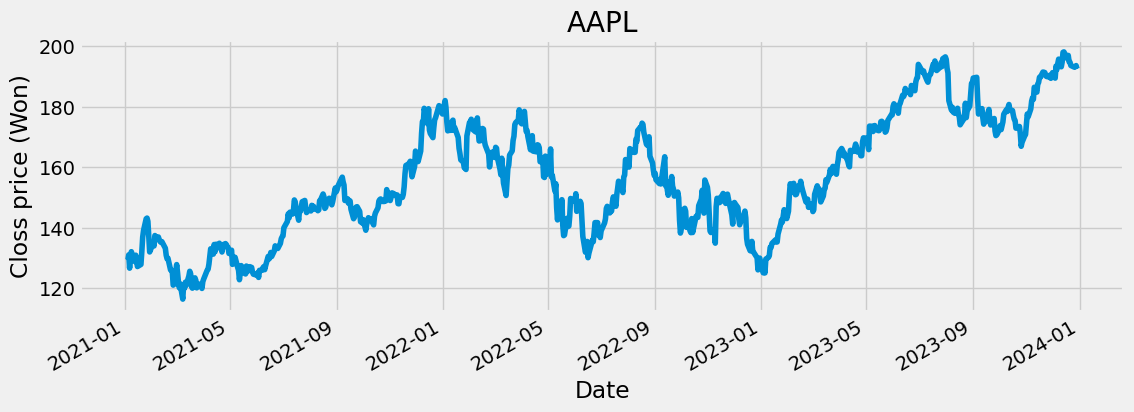

In [5]:
ax = df_input['y'].plot(title = ticker, figsize =(12,4))
ax.set_ylabel('Closs price (Won)')
plt.show()

# 4. 모델 적합

In [6]:
model_prophet = Prophet(changepoint_prior_scale = 0.15, daily_seasonality = True)
model_prophet.fit(df_input)

17:11:24 - cmdstanpy - INFO - Chain [1] start processing
17:11:25 - cmdstanpy - INFO - Chain [1] done processing


# 5. 향후 1년간의 time stamp 생성

In [7]:
fcast_time = 365 # 365일 예측
future = model_prophet.make_future_dataframe(periods = fcast_time, freq = 'D')
future.tail(10)

,ds
1108,2024-12-19
1109,2024-12-20
1110,2024-12-21
1111,2024-12-22
1112,2024-12-23
1113,2024-12-24
1114,2024-12-25
1115,2024-12-26
1116,2024-12-27
1117,2024-12-28


주말 제외 작업 & 공휴일 제거 작업

In [15]:
from workalendar.usa import UnitedStates
# AAPL의 경우 미국 거래소에서 거래가 이루어지니 미국 공휴일 정보 가져와서 리스트로 만드는 과정
# cal = workalendar.usa.UnitedStates()
cal = UnitedStates()
holiday_dates = []

for year in range(2021, 2025):  # 2021년부터 2024년까지
    holiday_dates.extend([date for date, _ in cal.holidays(year)])

In [16]:
holiday_dates

[datetime.date(2021, 1, 1),
 datetime.date(2021, 1, 18),
 datetime.date(2021, 2, 15),
 datetime.date(2021, 5, 31),
 datetime.date(2021, 7, 4),
 datetime.date(2021, 7, 5),
 datetime.date(2021, 9, 6),
 datetime.date(2021, 10, 11),
 datetime.date(2021, 11, 11),
 datetime.date(2021, 11, 25),
 datetime.date(2021, 12, 24),
 datetime.date(2021, 12, 25),
 datetime.date(2021, 12, 31),
 datetime.date(2021, 12, 31),
 datetime.date(2022, 1, 1),
 datetime.date(2022, 1, 17),
 datetime.date(2022, 2, 21),
 datetime.date(2022, 5, 30),
 datetime.date(2022, 7, 4),
 datetime.date(2022, 9, 5),
 datetime.date(2022, 10, 10),
 datetime.date(2022, 11, 11),
 datetime.date(2022, 11, 24),
 datetime.date(2022, 12, 25),
 datetime.date(2022, 12, 26),
 datetime.date(2023, 1, 1),
 datetime.date(2023, 1, 2),
 datetime.date(2023, 1, 16),
 datetime.date(2023, 2, 20),
 datetime.date(2023, 5, 29),
 datetime.date(2023, 7, 4),
 datetime.date(2023, 9, 4),
 datetime.date(2023, 10, 9),
 datetime.date(2023, 11, 10),
 datetime.da

In [17]:
future = future[future['ds'].dt.dayofweek < 5] # 주말 제외 작업
future = future[~future['ds'].isin(holiday_dates)] # 공휴일 제외 작업

In [18]:
display(future.head(1))
display(future.tail(1))

,ds
0,2021-01-04


,ds
1116,2024-12-27


# 6. 예측 결과 생성

In [19]:
df_forecast = model_prophet.predict(future)
df_forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
991,2024-12-20,208.399744,42.877754,373.379953
992,2024-12-23,208.497468,42.763213,375.124421
993,2024-12-24,208.480149,41.317198,375.427211
994,2024-12-26,208.297338,43.980230,375.135442
995,2024-12-27,208.379444,41.126038,375.695957


In [20]:
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
df_forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-04,125.837293,128.005237,138.030035,125.837293,125.837293,7.130274,7.130274,7.130274,2.360639,2.360639,2.360639,0.160907,0.160907,0.160907,4.608728,4.608728,4.608728,0.0,0.0,0.0,132.967567
1,2021-01-05,125.788028,127.522810,138.091182,125.788028,125.788028,6.900233,6.900233,6.900233,2.360639,2.360639,2.360639,0.143280,0.143280,0.143280,4.396314,4.396314,4.396314,0.0,0.0,0.0,132.688260
2,2021-01-06,125.738762,126.872047,137.743668,125.738762,125.738762,6.693765,6.693765,6.693765,2.360639,2.360639,2.360639,0.150670,0.150670,0.150670,4.182456,4.182456,4.182456,0.0,0.0,0.0,132.432527


In [21]:
model_prophet.predict_seasonal_components(df_forecast).head(3)

,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper
0,7.130274,7.130274,7.130274,2.360639,2.360639,2.360639,0.160907,0.160907,0.160907,4.608728,4.608728,4.608728,0.0,0.0,0.0
1,6.900233,6.900233,6.900233,2.360639,2.360639,2.360639,0.143280,0.143280,0.143280,4.396314,4.396314,4.396314,0.0,0.0,0.0
2,6.693765,6.693765,6.693765,2.360639,2.360639,2.360639,0.150670,0.150670,0.150670,4.182456,4.182456,4.182456,0.0,0.0,0.0


In [22]:
model_prophet.predictive_samples(future)

{'yhat': array([[135.85919058, 127.87015525, 134.07615676, ..., 135.11033536,
         127.64181244, 134.60267375],
        [133.00688782, 125.62995972, 127.23853192, ..., 134.10924334,
         130.4752966 , 135.65187321],
        [138.30341165, 128.63022572, 137.25925154, ..., 134.95629106,
         128.44009133, 125.39048479],
        ...,
        [ 73.06751326, 167.78720283, -39.6255238 , ..., 383.6379752 ,
          67.26582591, 390.26659348],
        [ 81.32484482, 175.73829521, -41.51366933, ..., 388.92677375,
          68.76923973, 390.27334825],
        [ 86.47306171, 176.57027579, -43.840371  , ..., 387.3895682 ,
          73.53560221, 396.37033653]]),
 'trend': array([[125.83729318, 125.83729318, 125.83729318, ..., 125.83729318,
         125.83729318, 125.83729318],
        [125.78802764, 125.78802764, 125.78802764, ..., 125.78802764,
         125.78802764, 125.78802764],
        [125.7387621 , 125.7387621 , 125.7387621 , ..., 125.7387621 ,
         125.7387621 , 125.7387621

# 7. 예측값 시각화

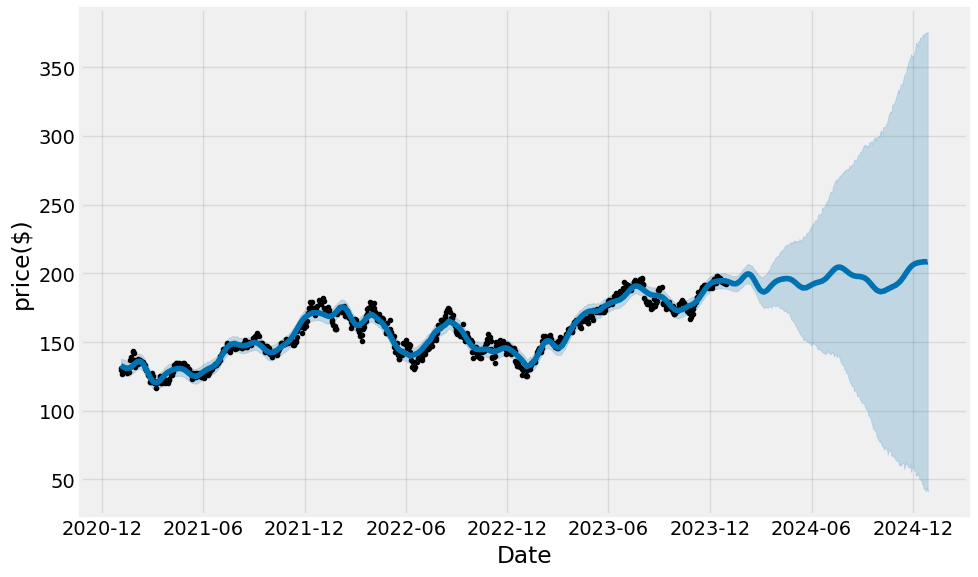

In [23]:
model_prophet.plot(df_forecast, xlabel = 'Date',ylabel ='price($)');

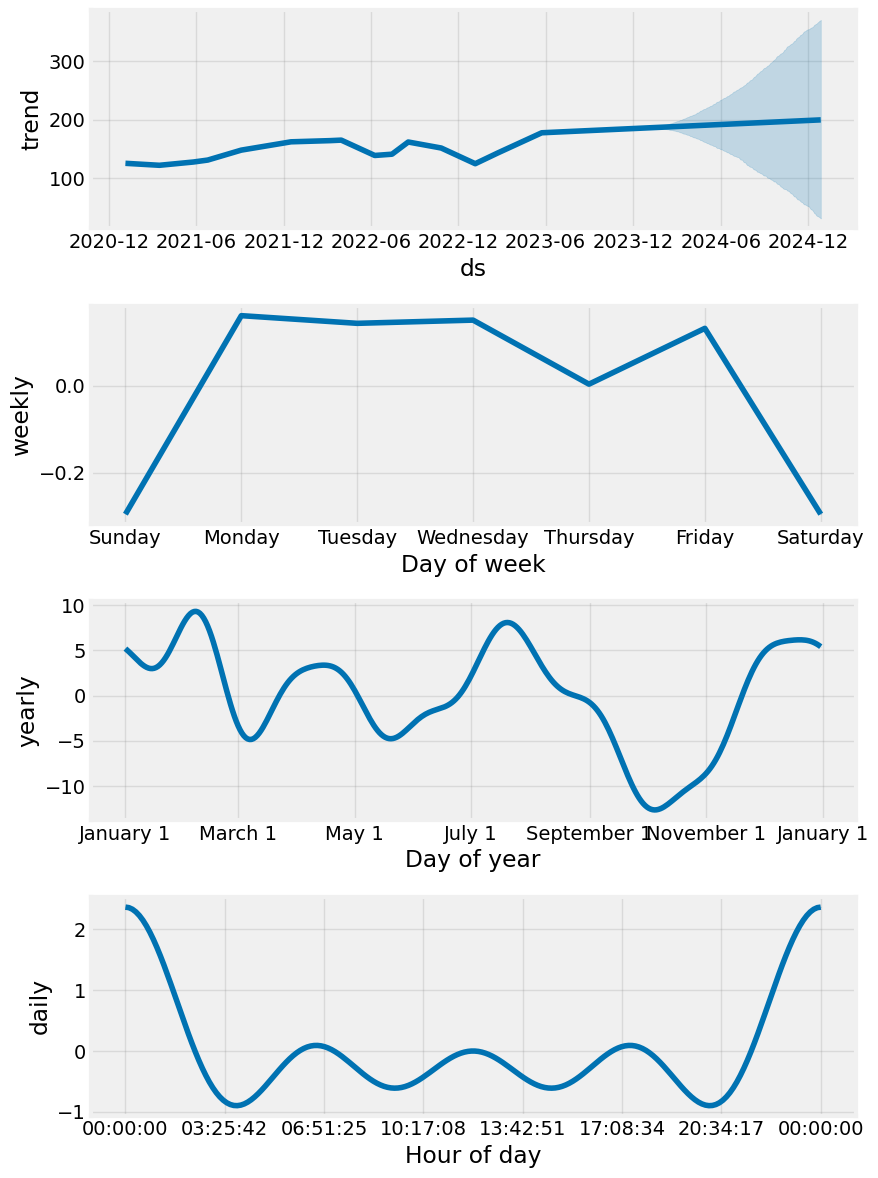

In [24]:
model_prophet.plot_components(df_forecast);

In [25]:
# plot_components(model_prophet)

In [26]:
# holidays = pd.DataFrame({
#   'holiday': 'new_year',
#   'ds': pd.to_datetime(['2022-01-01', '2023-01-01']),
#   'lower_window': 0,
#   'upper_window': 1,
# })

In [27]:
# df.to_csv('aapl_2021-01-01to2023-12-31.csv', index=False)

In [28]:
df.iloc[-10:]

,Open,High,Low,Close,Adj Close,Volume,ds,y
Date,,,,,,,,
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.318222,128256700,2023-12-15,197.570007
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900,2023-12-18,195.889999
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100,2023-12-19,196.940002
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.581711,52242800,2023-12-20,194.830002
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.431885,46482500,2023-12-21,194.679993
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,2023-12-22,193.600006
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,2023-12-26,193.050003
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,2023-12-27,193.149994
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,2023-12-28,193.580002


In [29]:
future.iloc[-364:-360]

,ds
637,2023-07-18
638,2023-07-19
639,2023-07-20
640,2023-07-21


In [30]:
df_forecast.iloc[-360:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
636,2023-07-24,180.290443,185.101154,196.010587,180.290443,180.290443,10.330220,10.330220,10.330220,2.360639,2.360639,2.360639,0.160907,0.160907,0.160907,7.808674,7.808674,7.808674,0.0,0.0,0.0,190.620664
637,2023-07-25,180.328206,184.444361,195.980586,180.328206,180.328206,10.144044,10.144044,10.144044,2.360639,2.360639,2.360639,0.143280,0.143280,0.143280,7.640125,7.640125,7.640125,0.0,0.0,0.0,190.472250
638,2023-07-26,180.365969,184.637079,195.512301,180.365969,180.365969,9.946891,9.946891,9.946891,2.360639,2.360639,2.360639,0.150670,0.150670,0.150670,7.435582,7.435582,7.435582,0.0,0.0,0.0,190.312859
639,2023-07-27,180.403732,184.351038,195.048759,180.403732,180.403732,9.562162,9.562162,9.562162,2.360639,2.360639,2.360639,0.003553,0.003553,0.003553,7.197970,7.197970,7.197970,0.0,0.0,0.0,189.965893
640,2023-07-28,180.441494,184.343566,195.026929,180.441494,180.441494,9.422927,9.422927,9.422927,2.360639,2.360639,2.360639,0.131752,0.131752,0.131752,6.930535,6.930535,6.930535,0.0,0.0,0.0,189.864421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,2024-12-20,199.738248,42.877754,373.379953,35.752850,365.988078,8.661495,8.661495,8.661495,2.360639,2.360639,2.360639,0.131752,0.131752,0.131752,6.169104,6.169104,6.169104,0.0,0.0,0.0,208.399744
992,2024-12-23,199.851536,42.763213,375.124421,34.626833,368.004093,8.645932,8.645932,8.645932,2.360639,2.360639,2.360639,0.160907,0.160907,0.160907,6.124386,6.124386,6.124386,0.0,0.0,0.0,208.497468
993,2024-12-24,199.889299,41.317198,375.427211,33.894237,369.030305,8.590850,8.590850,8.590850,2.360639,2.360639,2.360639,0.143280,0.143280,0.143280,6.086931,6.086931,6.086931,0.0,0.0,0.0,208.480149
994,2024-12-26,199.964825,43.980230,375.135442,32.801536,369.860028,8.332514,8.332514,8.332514,2.360639,2.360639,2.360639,0.003553,0.003553,0.003553,5.968322,5.968322,5.968322,0.0,0.0,0.0,208.297338


In [31]:
# df_forecast.to_csv('predict_aapl_2021-01-01to2023-12-31_to365days.csv', index=False)

In [32]:
diff_count = sum(df['y'].values != df_forecast['yhat'].head(len(df)).values)
print(f"학습 데이터 기간 동안 실제 값과 예측 값이 다른 경우의 수: {diff_count}")

학습 데이터 기간 동안 실제 값과 예측 값이 다른 경우의 수: 753


In [33]:
start_r = '2024-01-01'
end_r = '2024-02-29'
ticker_r = 'AAPL'

df_recent = yf.download(ticker_r, start=start_r, end=end_r)
df_recent['ds'] = pd.to_datetime(df_recent.index, format = '%Y-%m-%d')
df_recent['y'] = df_recent['Close']
display(df_recent)
# df_recent.to_csv('aapl_2024-01-01to2024-02-29.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ds,y
Date,,,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.403412,82488700,2024-01-02,185.639999
2024-01-03,184.220001,185.880005,183.429993,184.250000,184.015198,58414500,2024-01-03,184.250000
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.678177,71983600,2024-01-04,181.910004
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.949097,62303300,2024-01-05,181.179993
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.323517,59144500,2024-01-08,185.559998
2024-01-09,183.919998,185.149994,182.729996,185.139999,184.904053,42841800,2024-01-09,185.139999
2024-01-10,184.350006,186.399994,183.919998,186.190002,185.952713,46792900,2024-01-10,186.190002
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.353485,49128400,2024-01-11,185.589996
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.683060,40444700,2024-01-12,185.919998


In [34]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,ds,y
Date,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.002113,143301900,2021-01-04,129.410004
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572311,97664900,2021-01-05,131.009995
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244392,155088000,2021-01-06,126.599998


In [35]:
df_forecast[['ds','yhat']].head(3)

,ds,yhat
0,2021-01-04,132.967567
1,2021-01-05,132.688260
2,2021-01-06,132.432527


In [36]:
test_data_date = df_recent[['ds','y']]

In [37]:
df_forecast[df_forecast['ds']>='2024-01-01']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
746,2024-01-02,186.408005,188.737172,199.614481,186.408005,186.408005,7.658043,7.658043,7.658043,2.360639,2.360639,2.360639,0.143280,0.143280,0.143280,5.154124,5.154124,5.154124,0.0,0.0,0.0,194.066048
747,2024-01-03,186.445768,188.404375,199.165972,186.445768,186.445768,7.476367,7.476367,7.476367,2.360639,2.360639,2.360639,0.150670,0.150670,0.150670,4.965059,4.965059,4.965059,0.0,0.0,0.0,193.922135
748,2024-01-04,186.483531,187.869878,198.914574,186.483531,186.483531,7.128825,7.128825,7.128825,2.360639,2.360639,2.360639,0.003553,0.003553,0.003553,4.764633,4.764633,4.764633,0.0,0.0,0.0,193.612355
749,2024-01-05,186.521294,188.387337,198.660316,186.521294,186.521294,7.048381,7.048381,7.048381,2.360639,2.360639,2.360639,0.131752,0.131752,0.131752,4.555990,4.555990,4.555990,0.0,0.0,0.0,193.569674
750,2024-01-08,186.634582,187.621420,198.781875,186.634582,186.634582,6.441511,6.441511,6.441511,2.360639,2.360639,2.360639,0.160907,0.160907,0.160907,3.919965,3.919965,3.919965,0.0,0.0,0.0,193.076093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,2024-12-20,199.738248,42.877754,373.379953,35.752850,365.988078,8.661495,8.661495,8.661495,2.360639,2.360639,2.360639,0.131752,0.131752,0.131752,6.169104,6.169104,6.169104,0.0,0.0,0.0,208.399744
992,2024-12-23,199.851536,42.763213,375.124421,34.626833,368.004093,8.645932,8.645932,8.645932,2.360639,2.360639,2.360639,0.160907,0.160907,0.160907,6.124386,6.124386,6.124386,0.0,0.0,0.0,208.497468
993,2024-12-24,199.889299,41.317198,375.427211,33.894237,369.030305,8.590850,8.590850,8.590850,2.360639,2.360639,2.360639,0.143280,0.143280,0.143280,6.086931,6.086931,6.086931,0.0,0.0,0.0,208.480149
994,2024-12-26,199.964825,43.980230,375.135442,32.801536,369.860028,8.332514,8.332514,8.332514,2.360639,2.360639,2.360639,0.003553,0.003553,0.003553,5.968322,5.968322,5.968322,0.0,0.0,0.0,208.297338


In [38]:
fc_date = df_forecast[df_forecast['ds']>='2024-01-01'].iloc[:len(test_data_date)][['ds','yhat']]

In [39]:
test_data_date = test_data_date.reset_index(drop=True)
fc_date = fc_date.reset_index(drop=True)

In [40]:
pd.concat([test_data_date, fc_date], axis=1)

,ds,y,ds,yhat
0,2024-01-02,185.639999,2024-01-02,194.066048
1,2024-01-03,184.250000,2024-01-03,193.922135
2,2024-01-04,181.910004,2024-01-04,193.612355
3,2024-01-05,181.179993,2024-01-05,193.569674
4,2024-01-08,185.559998,2024-01-08,193.076093
5,2024-01-09,185.139999,2024-01-09,192.896007
6,2024-01-10,186.190002,2024-01-10,192.755115
7,2024-01-11,185.589996,2024-01-11,192.479045
8,2024-01-12,185.919998,2024-01-12,192.502720
9,2024-01-16,183.630005,2024-01-16,192.432711


In [41]:
test_data = df_recent['y']
fc = df_forecast[df_forecast['ds']>='2024-01-01'].iloc[:len(test_data_date)]['yhat']

In [53]:
test_data = test_data.reset_index(drop=True)
fc = fc.reset_index(drop=True)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
mse = mean_squared_error((test_data), (fc))
print('MSE: ', mse)
mae = mean_absolute_error((test_data), (fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error((test_data), (fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs((fc) - (test_data))/np.abs((test_data)))
print('MAPE: ' ,'{:.2f}%'.format(mape*100))

MSE:  89.61760808516308
MAE:  8.566209109590414
RMSE:  9.466657704024325
MAPE:  4.63%


In [58]:
mse = mean_squared_error(test_data, fc)
print('MSE: ', mse)
mae = mean_absolute_error(test_data, fc)
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: ', rmse)
mape = mean_absolute_percentage_error(test_data, fc)
print('MAPE: ' , '{:.2f}%'.format(mape*100))

MSE:  89.61760808516308
MAE:  8.566209109590414
RMSE:  9.466657704024325
MAPE:  4.63%
